In [1]:
# Partial Dependence Plots
# can be interepreted similarly to the coefficients in linear or logistic regression models,
# but partial dependence plots can capture more complex patterns, and they can be used with any model. 

In [1]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [1]:
# import data
melbourne_data = pd.read_csv("melb_data.csv")

price_data = melbourne_data["Price"]
feature_col = ["Distance", "Landsize", "BuildingArea"]
feature_data = melbourne_data[feature_col]

my_imputer = Imputer()
imputed_feature_data = my_imputer.fit_transform(feature_data)

In [14]:
pd.DataFrame(data=imputed_feature_data, columns = ["Distance", "Landsize", "BuildingArea"]).head()

,Distance,Landsize,BuildingArea
0,2.5,202.0,151.96765
1,2.5,156.0,79.00000
2,2.5,134.0,150.00000
3,2.5,94.0,151.96765
4,2.5,120.0,142.00000


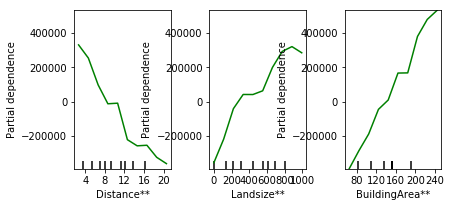

In [21]:
my_model = GradientBoostingRegressor()
my_model.fit(imputed_feature_data, price_data)
# make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 1, 2], # column numbers of plots we want to show
                                   X=imputed_feature_data,            # raw predictors data.
                                   feature_names=['Distance**', 'Landsize**', 'BuildingArea**'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

In [ ]:
# Pipelines:
# pipeline bundles preprocessing and modeling steps to keep your data processing and modeling code organized

In [2]:
feature_col = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
feature_data = melbourne_data[feature_col]
train_feature, test_feature, train_price, test_price = train_test_split(feature_data, price_data)

In [9]:
# a modeling process that uses an Imputer to fill in missing values,
# followed by a RandomForestRegressor to make predictions
# these can be bundled together with the make_pipeline function

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())
my_pipeline.fit(train_feature, train_price)
predictions = my_pipeline.predict(test_feature)


# the above is equivalent to following:

# my_imputer = Imputer()
# my_model = RandomForestRegressor()

# imputed_train_X = my_imputer.fit_transform(train_X)
# imputed_test_X = my_imputer.transform(test_X)
# my_model.fit(imputed_train_X, train_y)
# predictions = my_model.predict(imputed_test_X)


In [10]:
my_pipeline

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_s...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [11]:
# set the fit_params argument
from xgboost import XGBRegressor
my_pipeline = make_pipeline(Imputer(), XGBRegressor())
my_pipeline.fit(train_feature, train_price, 
                xgbregressor__early_stopping_rounds=5, xgbregressor__eval_set=[(test_feature, test_price)], xgbregressor__verbose=False)

ImportError: No module named xgboost

In [ ]:
# The Cross-Validation Procedure
# cross-validation helps with parameter tuning, but it also prevents from overfitting
# It can be very difficult to do cross-validation properly if you arent't using pipelines
from sklearn.model_selection import cross_val_score
# 5-fold cross-validation
scores = cross_val_score(my_pipeline, feature_data, price_data, scoring='neg_mean_absolute_error', cv=5)
print(scores)

# "scoring" argument specifies what measure of model quality to report, there is a list of options
# http://scikit-learn.org/stable/modules/model_evaluation.html

# suppose we use n-fold cross-validation, then there would be n values in scores
# to use a single measure of model quality to compare between models, we may take the average across experiments.
average_mae = -1 * scores.mean()

In [ ]:
# Data Leakage
# There are two main types of leakage: Leaky Predictors and a Leaky Validation Strategies.

# Leaky Predictors:
# in the training dataset, a variable is updated (or created) after the target value is realized,
# so in the model this variable has a strong relationship with target value,
# however when we use this model to make new predictions, that data won't be available to the model.

# Leaky Validation Strategy
# occurs when you aren't careful distinguishing training data from validation data,
# the result is the model will get very good validation scores,
# but perform poorly when it is deployed to make decisions.

In [2]:
# data = pd.read_csv("AER_credit_card_data.csv")
"""
  card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  
"""

In [7]:
data = pd.read_csv("AER_credit_card_data.csv", true_values = ['yes'], false_values = ['no'])
print(data.head())
data.shape

   card  reports       age  income     share  expenditure  owner  selfemp  \
0  True        0  37.66667  4.5200  0.033270   124.983300   True    False   
1  True        0  33.25000  2.4200  0.005217     9.854167  False    False   
2  True        0  33.66667  4.5000  0.004156    15.000000   True    False   
3  True        0  30.50000  2.5400  0.065214   137.869200  False    False   
4  True        0  32.16667  9.7867  0.067051   546.503300   True    False   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


(1319, 12)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
target = data["card"]
features = data.drop(["card"], axis=1)
print(target.head())
print(features.head())

0    True
1    True
2    True
3    True
4    True
Name: card, dtype: bool
   reports       age  income     share  expenditure  owner  selfemp  \
0        0  37.66667  4.5200  0.033270   124.983300   True    False   
1        0  33.25000  2.4200  0.005217     9.854167  False    False   
2        0  33.66667  4.5000  0.004156    15.000000   True    False   
3        0  30.50000  2.5400  0.065214   137.869200  False    False   
4        0  32.16667  9.7867  0.067051   546.503300   True    False   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


In [14]:
modeling_pipeline = make_pipeline(RandomForestClassifier())
cv_scores = cross_val_score(modeling_pipeline, features, target, scoring='accuracy')
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.978765


In [28]:
# produce a basic data comparisons about "expenditure"

# expenditures_cardholders = data.expenditure[data.card]
# expenditures_noncardholders = data.expenditure[~data.card]
# the above two are equivalent to below:

expenditures_cardholders = data["expenditure"][data["card"] == True]
expenditures_noncardholders = data["expenditure"][data["card"] == False]
print(expenditures_noncardholders.head())

11    0.0
12    0.0
17    0.0
19    0.0
21    0.0
Name: expenditure, dtype: float64


In [29]:
# Fraction of those who received a card with no expenditures
print((expenditures_cardholders == 0).mean())
# Fraction of those who not received a card with no expenditures
print((expenditures_noncardholders == 0).mean())

# this seems a data leak, where "expenditures" probably means expenditures on the card they applied for,
# and "share" is partially determined by "expenditure" too.

0.020527859237536656
1.0


In [31]:
# model without data leakage
potential_leaks = ['expenditure', 'share', 'active', 'majorcards']
features_wo_leaks = features.drop(potential_leaks, axis=1)
cv_scores = cross_val_score(modeling_pipeline, features_wo_leaks, target, scoring='accuracy')
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.808200
